This is a Kaggle dataset for graduate admission.The predicated output for this dataset gives us a fair idea about students chances for getting admission in particular University.

In [1]:
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
#information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
import matplotlib.pyplot as plt

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(9,9))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8
0,1,0.45957,0.195566,-0.438985,0.168087,-0.121684,0.494017,-0.238448,-0.361886
1,0.45957,1,0.611315,0.259963,0.447112,-0.11356,0.0362479,-0.259896,0.209784
2,0.195566,0.611315,1,0.251037,-0.0373521,-0.092394,0.0170831,-0.407235,0.0879038
3,-0.438985,0.259963,0.251037,1,-0.14748,0.645247,-0.211751,0.397388,0.084496
4,0.168087,0.447112,-0.0373521,-0.14748,1,-0.500359,0.000303618,-0.568069,0.405314
5,-0.121684,-0.11356,-0.092394,0.645247,-0.500359,1,0.0189393,0.792286,-0.291083
6,0.494017,0.0362479,0.0170831,-0.211751,0.000303618,0.0189393,1,-0.166828,0.149443
7,-0.238448,-0.259896,-0.407235,0.397388,-0.568069,0.792286,-0.166828,1,-0.325124
8,-0.361886,0.209784,0.0879038,0.084496,0.405314,-0.291083,0.149443,-0.325124,1


In [6]:
#correlation matrix
cor  = data.corr()
cor

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [84]:
#List the variables with highest correlation with output variable
#Correlation with output variable
cor_target = abs(cor["Chance of Admit "])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

So correlation matrix gives us some idea of how all the variables in our dataset are correlated to our output variable chance of admit.

Based on the research i did i have categrised the GRE Score into 4 categories.
1.Excellent(score>=335)
2.Better(score>=321.5)
3.Good(score>=309)
4.Below average(score<=307.5)

Note : GRE is exam is conducted for total of 340 marks

In [63]:
# Number of people who fall in excellent category
excellent = data[data['GRE Score'] >= 335]
excellent['GRE Score'].count()

25

In [75]:
# Number of people who fall in Better score category
Better = data[(data['GRE Score'] >= 321.5) & (data['GRE Score'] <= 334)]
Better['GRE Score'].count()

125

In [76]:
# Number of people who fall in Good Score category
Good = data[(data['GRE Score'] >= 309) & (data['GRE Score'] <= 320)]
Good['GRE Score'].count()

136

In [67]:
# Number of people who fall in Below Average category
Below_Average = data[data['GRE Score'] <= 307.5]
Below_Average['GRE Score'].count()

90

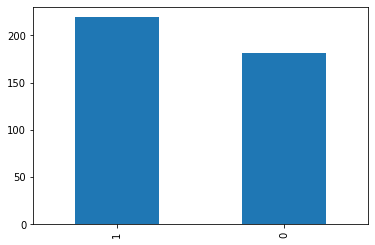

In [62]:
# Number of people who have done research and not done research
# 1=done research
# 0=not done research
data['Research'].value_counts().plot(kind='bar');

From the above graph we can see that number of students who have done rsearch are more in our dataset compared to those who havent done research.

In [77]:
# Number of people having more than 80% chance of getting admission are
Good_chance = data[data['Chance of Admit '] >= 0.8]
Good_chance['Chance of Admit '].count()

128

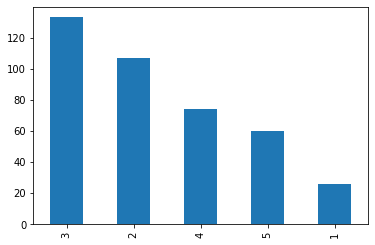

In [78]:
# Dividing students in dataset based on university rating and 
# plotting the bar graph to count the number of students falling in different categories of universities.
data['University Rating'].value_counts().plot(kind='bar');

From the above graph, it can be seen that maximum number of the students in our dataset are from the universisties having rating 3. ie, average college. 

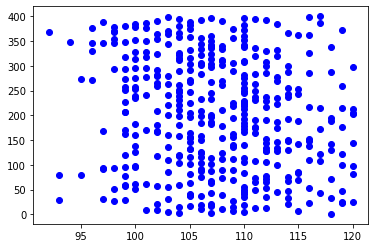

In [83]:
# scatter plot to check where our data is more concentrated based on TOEFL score
plt.scatter(data['TOEFL Score'],data['Serial No.'],color='b')

From the above graph we can say that most of the students in our dataset have TOEFL score in the range 105 to 115.

In [95]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [107]:
# We shouldn't include serial no. column in our x variable
data.iloc[:,1:-1].head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [109]:
# set chance of admit as your target or y variable
data.iloc[:,-1]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [111]:
# Setting the values for x and y variables
# ie, our labels and target value
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [114]:
# Using the Hold Out method for cross validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [115]:
X_train.shape

(300, 7)

300 rows out of 4oo rows are selected for training and 7 columns are selected as our labeled data.

In [116]:
y_train.shape

(300,)

300 rows out of 400 rows are selected for training and 1 column is selected as our target concept.

In [117]:
# fitting the simple linear regression model on our training data
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
reg.score(X_test,y_test)

0.7248631204868363

In [158]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
y=y>0.5

In [159]:
y

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [160]:
# use one hot encode to encode y variable to numeric values
# Assigning numerical values and storing in another column
y = labelencoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [161]:
y_train 

array([0.74, 0.56, 0.78, 0.52, 0.8 , 0.75, 0.96, 0.62, 0.79, 0.68, 0.48,
       0.74, 0.76, 0.7 , 0.86, 0.91, 0.9 , 0.78, 0.7 , 0.59, 0.34, 0.71,
       0.91, 0.69, 0.47, 0.92, 0.94, 0.71, 0.74, 0.64, 0.93, 0.77, 0.61,
       0.6 , 0.84, 0.64, 0.84, 0.77, 0.63, 0.65, 0.81, 0.84, 0.65, 0.59,
       0.7 , 0.57, 0.7 , 0.81, 0.88, 0.56, 0.8 , 0.94, 0.79, 0.62, 0.93,
       0.76, 0.78, 0.85, 0.7 , 0.71, 0.8 , 0.79, 0.9 , 0.56, 0.67, 0.94,
       0.74, 0.86, 0.76, 0.47, 0.64, 0.81, 0.73, 0.71, 0.73, 0.89, 0.93,
       0.86, 0.75, 0.84, 0.67, 0.84, 0.71, 0.73, 0.76, 0.79, 0.54, 0.71,
       0.85, 0.54, 0.56, 0.8 , 0.64, 0.44, 0.72, 0.85, 0.7 , 0.95, 0.34,
       0.75, 0.8 , 0.85, 0.74, 0.58, 0.66, 0.8 , 0.59, 0.88, 0.69, 0.84,
       0.57, 0.97, 0.75, 0.91, 0.65, 0.92, 0.44, 0.69, 0.65, 0.76, 0.62,
       0.58, 0.46, 0.63, 0.94, 0.46, 0.77, 0.89, 0.96, 0.62, 0.57, 0.96,
       0.96, 0.49, 0.71, 0.57, 0.74, 0.53, 0.92, 0.88, 0.91, 0.47, 0.85,
       0.93, 0.64, 0.38, 0.61, 0.79, 0.65, 0.86, 0.

In [169]:
y_train = y_train>0.5
y_train = labelencoder.fit_transform(y_train)
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [163]:
X_train

array([[320.  , 104.  ,   3.  , ...,   2.5 ,   8.57,   1.  ],
       [315.  , 107.  ,   2.  , ...,   3.  ,   8.5 ,   1.  ],
       [311.  , 107.  ,   4.  , ...,   4.5 ,   9.  ,   1.  ],
       ...,
       [290.  , 104.  ,   4.  , ...,   2.5 ,   7.46,   0.  ],
       [339.  , 119.  ,   5.  , ...,   4.  ,   9.7 ,   0.  ],
       [322.  , 110.  ,   4.  , ...,   5.  ,   9.13,   1.  ]])

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [170]:
# make sure to use modified y and not y_train
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [173]:
X_test

array([[309.  , 105.  ,   5.  ,   3.5 ,   3.5 ,   8.56,   0.  ],
       [308.  , 110.  ,   4.  ,   3.5 ,   3.  ,   8.6 ,   0.  ],
       [326.  , 110.  ,   3.  ,   3.5 ,   3.5 ,   8.76,   1.  ],
       [306.  , 105.  ,   2.  ,   3.  ,   2.5 ,   8.26,   0.  ],
       [316.  , 105.  ,   3.  ,   3.  ,   3.5 ,   8.73,   0.  ],
       [309.  , 100.  ,   2.  ,   3.  ,   3.  ,   8.1 ,   0.  ],
       [312.  , 109.  ,   3.  ,   3.  ,   3.  ,   8.69,   0.  ],
       [312.  , 104.  ,   3.  ,   3.5 ,   4.  ,   8.09,   0.  ],
       [332.  , 118.  ,   2.  ,   4.5 ,   3.5 ,   9.36,   1.  ],
       [331.  , 117.  ,   4.  ,   4.5 ,   5.  ,   9.42,   1.  ],
       [300.  , 105.  ,   1.  ,   1.  ,   2.  ,   7.8 ,   0.  ],
       [333.  , 113.  ,   5.  ,   4.  ,   4.  ,   9.28,   1.  ],
       [320.  , 110.  ,   2.  ,   4.  ,   3.5 ,   8.56,   0.  ],
       [302.  ,  99.  ,   1.  ,   2.  ,   2.  ,   7.25,   0.  ],
       [328.  , 112.  ,   4.  ,   4.  ,   4.5 ,   9.1 ,   1.  ],
       [311.  , 104.  ,  

In [174]:
y_test

array([0.71, 0.7 , 0.79, 0.73, 0.72, 0.48, 0.77, 0.71, 0.9 , 0.94, 0.58,
       0.89, 0.72, 0.57, 0.78, 0.42, 0.64, 0.84, 0.63, 0.72, 0.9 , 0.83,
       0.57, 0.47, 0.85, 0.67, 0.44, 0.54, 0.92, 0.62, 0.68, 0.73, 0.73,
       0.61, 0.55, 0.74, 0.64, 0.89, 0.73, 0.95, 0.71, 0.72, 0.75, 0.76,
       0.86, 0.7 , 0.39, 0.79, 0.61, 0.64, 0.71, 0.8 , 0.61, 0.89, 0.68,
       0.79, 0.78, 0.52, 0.76, 0.88, 0.74, 0.49, 0.65, 0.59, 0.87, 0.89,
       0.81, 0.9 , 0.8 , 0.76, 0.68, 0.87, 0.68, 0.64, 0.91, 0.61, 0.69,
       0.62, 0.93, 0.43, 0.72, 0.52, 0.64, 0.87, 0.62, 0.82, 0.57, 0.79,
       0.82, 0.81, 0.78, 0.93, 0.64, 0.5 , 0.9 , 0.75, 0.82, 0.64, 0.75,
       0.77])

In [175]:
# This step is necessary because both y_test and y_train need to be in the same form.
y_test = y_test>0.5
y_test = labelencoder.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [176]:
# predicting the score for decision tree classifier
y_pred_dt = dt_clf.predict(X_test)
dt_clf.score(X_test,y_test)

0.93

In [178]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_dt)

In [179]:
cm

array([[ 2,  6],
       [ 1, 91]])

In [181]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [182]:
accuracy = (TP+TN)/100

In [183]:
# accuracy using confusion matrix
accuracy

0.93